In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def scaling(X):
  m, n=X.shape

  for j in range(n):
    if (np.std(X[:,j])!=0):
      X[:,j]=(X[:,j]-np.mean(X[:,j]))/np.std(X[:,j])
  return X

In [3]:
def diff(w, b, X, Y, lamda):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(X[i], w) + b) - Y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  dj_dw=dj_dw+(lamda*w)/m

  return dj_dw, dj_db

In [4]:
def cost (w, b,X , Y, lamda):
  m,n =X.shape
  j=0
  for i in range(m):
    j=j+(np.dot(w,X[i])+b-Y[i])**2
  j=j/(2*m) + (lamda*np.dot(w,w))/(2*m)
  return j

In [5]:
def grad(w, b, X, Y, ittr, alpha, lamda):
  j=[]
  for i in range (ittr):
    df_dw, df_db=diff (w, b, X, Y, lamda )
    w=w-(alpha*df_dw)
    b=b-(alpha*df_db)
    j.append(cost(w,b,X,Y,lamda))
    if (i%10==0):
      print(f"The cost function after {i} itterations is {cost(w,b, X, Y, lamda)}")
  plt.plot(range(ittr), j)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost (j)')
  plt.title('Cost vs. Iterations')
  plt.show()
  #print(w)
  #print(b)
  return w, b

In [6]:
def poly(X, X_test, k):
  m, n=X.shape
  m1, n1=X_test.shape
  X_poly=np.zeros((m,k*n))
  X_test_poly=np.ones((m1,k*n1))
  count=0
  i=0
  while (i<n):
    j=1
    while (j<k+1):
      X_poly[:,count]=X[:,i]**j
      count+=1
      j+=1
    i+=1

  count=0
  i=0
  while (i<n1):
    j=1
    while (j<k+1):
      X_test_poly[:,count]=X_test[:,i]**j
      count+=1
      j+=1
    i+=1
  return X_poly, X_test_poly

In [7]:
def regression(X, Y, X_test, k, ittr, alpha, lamda):
  X, X_test=poly(X, X_test, k)
  X=scaling(X)
  m, n= X.shape
  a, c= X_test.shape
  W=np.zeros((n,))
  b=0
  #X, Y= scaling (X,Y)
  #X_test, temp =scaling(X_test)

  w, b= grad(W, b, X, Y, ittr, alpha, lamda)

  predict=np.zeros(a)
  for i in range (a):
    predict[i]=np.dot(w, X_test[i, :])+b
  return predict, cost(w,b,X,Y,lamda)

In [ ]:
def r2_score(y_true, y_pred):
  ss_res = np.sum((y_true - y_pred)**2)
  ss_tot = np.sum((y_true - np.mean(y_true))**2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [8]:
train=np.array(pd.read_csv("polynomial_regression_train.csv"))
test=np.array(pd.read_csv("polynomial_regression_test.csv"))

In [9]:
a, b= train.shape
a1, b1= test.shape

In [10]:
X=np.zeros([a,b-2])
Y=np.zeros((a,))


for i in range (a):
  X[i]=train[i, 1:b-1]
  Y[i]=train[i,b-1]
#X_train=X_train.transpose()
#X_train, Y_train= scaling(X_train, Y_train)
#temp=X_train

X= scaling(X)
X_train=X
Y_train=Y

In [ ]:
m = X.shape[0]
ind = np.random.permutation(m)
spind = int(0.8 * m)

train_indices = ind[:spind]
val_indices = ind[spind:]


X_train = X[train_indices]
Y_train = Y[train_indices]
X_cv = X[val_indices]
Y_cv = Y[val_indices]

In [11]:
X_test=np.zeros([a1,b1-1])
for i in range (a1):
  X_test[i]=test[i, 1:b1]
X_test= scaling(X_test)

In [ ]:
#X_train, X_test=poly(X_train, X_test, 3)
print(X_train)

[[-0.2714613   0.8506241  -1.08085056  0.36352986 -0.30120231]
 [-0.33649379 -1.02157784  0.53130124  0.04676399  0.60073514]
 [-1.08580695 -0.11957387 -0.0035855   0.42165651 -0.20624923]
 ...
 [-1.46397092  1.52479322  0.88221825  0.29940981  1.14443348]
 [ 1.12358524  0.27427466 -0.05469282  0.60830112 -0.53226703]
 [-0.87768718 -1.43548731 -0.70636114  0.88144235 -1.0689373 ]]


In [12]:
degree=3
ittr=100
alpha=0.1
lamda=1

The cost function after 0 itterations is 5.4189915301613124e-17
The cost function after 10 itterations is 4.456423957475171e-17
The cost function after 20 itterations is 4.35099575036392e-17
The cost function after 30 itterations is 4.337880124236057e-17
The cost function after 40 itterations is 4.336073316754788e-17
The cost function after 50 itterations is 4.335698536538293e-17
The cost function after 60 itterations is 4.3355254468243403e-17
The cost function after 70 itterations is 4.3353972175724536e-17
The cost function after 80 itterations is 4.3352912223015514e-17
The cost function after 90 itterations is 4.335202042025011e-17


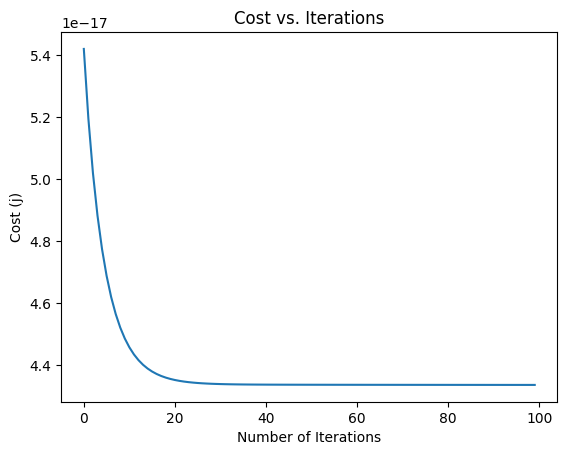

[ 7.39719118e-09 -5.80131960e-09 -5.21295875e-09 ...  4.50681265e-09
 -3.36538956e-09 -4.69755146e-09]


In [13]:
predictions, cos=regression(X_train, Y_train, X_test, degree, ittr, alpha, lamda)
print(predictions)

In [14]:
np.savetxt('polynimialtest.csv', predictions, delimiter=',')

In [ ]:
r2=r2_score(Y_cv, predictions)
mse = np.mean((Y_cv - predictions) ** 2)
print(f"The cost after {ittr} itterations is: {cos}")
print(f"The Mean Squared Error of the Algo is: {mse}")
print(f"The R2 score of the Algo is: {r2}")

The cost after 100 itterations is: 4.35555272395432e-17
The Mean Squared Error of the Algo is: 8.680604752719816e-17
The R2 score of the Algo is: 0.2217964847055306
